## Imports

In [35]:
import pandas as pd
import sqlite3

## Make a connection to the database

In [36]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## Do graph like in picture
• analyze only the users and not the admins
• the fontsize and the figsize are still the same

• night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59

In [37]:
sel = """
    SELECT timestamp FROM checker
    WHERE uid LIKE 'user_%';"""

com_df = pd.read_sql(sel, conn, parse_dates=['timestamp'])
com_df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [38]:
com_df['daytime'] = pd.cut(com_df.timestamp.dt.hour,
                            bins=[-1, 4, 10, 17, 24],
                            labels=['night', 'morning', 'afternoon', 'evening'])
com_df

,timestamp,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


In [39]:
com_by_day = com_df.groupby(by=[com_df.timestamp.dt.date, com_df.daytime]).count()
com_by_day.rename(columns={'timestamp': 'commits'}, inplace=True)
com_by_day

commits
timestamp  daytime           
2020-04-17 night            0
           morning         13
           afternoon       10
           evening          0
2020-04-18 night            0
...                       ...
2020-05-20 evening         10
2020-05-21 night            0
           morning          1
           afternoon       28
           evening         20

[140 rows x 1 columns]

In [40]:
com_by_day = com_by_day.unstack()
com_by_day.head()

commits                          
daytime      night morning afternoon evening
timestamp                                   
2020-04-17       0      13        10       0
2020-04-18       0       1        40      28
2020-04-19       2      11         9      11
2020-04-20       0       0        15      10
2020-04-21       0       0         9      16

In [41]:
com_by_day = com_by_day.droplevel(0, axis='columns')
com_by_day.head()

daytime,night,morning,afternoon,evening
timestamp,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16


In [42]:
com_by_day.index.rename('date', inplace=True)

## Choose a palette that you really enjoy, you do not have to replicate it from the graph above

<AxesSubplot:title={'center':'Commits per day'}, xlabel='date'>

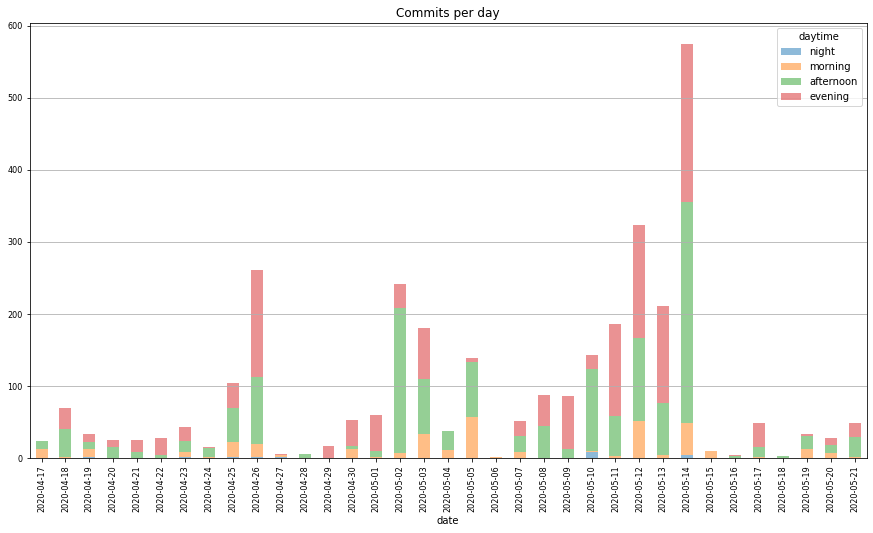

In [43]:
plt = com_by_day.plot.bar(figsize=(15, 8),
                          fontsize=8,
                          title='Commits per day',
                          rot=90,
                          alpha=0.5,
                          stacked=True)
plt.grid(axis='y')
plt

## Disconnect database

In [44]:
conn.close()

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?

afternoon and evening

## Which day has:
* the most number of commits
* and at the same time, the number of commits in the evening is higher
than in the afternoon?

2020-05-12